🥰

# Вопрос 4
Давайте вернёмся к данным выживаемости пациентов с лейкоцитарной лимфомой из видео про критерий знаков:

49, 58, 75, 110, 112, 132, 151, 276, 281, 362*

Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы 
- $H_0\colon$ medX = 200 
на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет. 

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.


Для классификатора используйте solver='liblinear'
Укажите для критерия знаковых рангов Вилкоксона mode='approx'
1 балл


In [9]:
import numpy as np
import pandas as pd

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
data = pd.DataFrame(np.array([49, 58, 75, 110, 112, 132, 151, 276, 281, 362]))
data.columns = ['time']
data

,time
0,49
1,58
2,75
3,110
4,112
5,132
6,151
7,276
8,281
9,362


In [13]:
data.describe()

,time
count,10.000000
mean,160.600000
std,107.763321
min,49.000000
25%,83.750000
50%,122.000000
75%,244.750000
max,362.000000


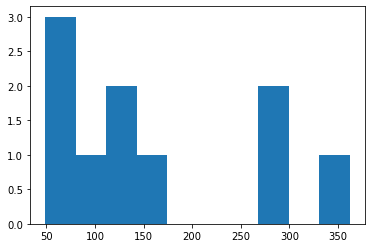

In [15]:
pylab.hist(data.time)
pylab.show()

In [19]:
from statsmodels.stats.weightstats import zconfint
print('95%% confidence interval for the mean time: [%f, %f]' % zconfint(data.time))

95% confidence interval for the mean time: [93.808829, 227.391171]


### Критерий знаков

$H_0\colon$ медиана времени равна 200

$H_1\colon$ медиана времени не равна 200

In [24]:
from statsmodels.stats.descriptivestats import sign_test
print("M: %d, p-value: %f" % sign_test(data.time, 200))

M: -2, p-value: 0.343750


### Критерий знаковых рангов Вилкоксона

In [25]:
from scipy import stats

In [29]:
m0 = 200
stats.wilcoxon(data.time - m0, mode='approx')

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

# Вопрос 5
В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся:

- 22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15

и в 9 лесах, где идёт вырубка:

- 17, 18, 18, 15, 12, 4, 14, 15, 10.


Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

In [32]:
data_nocut = pd.DataFrame(np.array([22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15]))
data_cut = pd.DataFrame(np.array([17, 18, 18, 15, 12, 4, 14, 15, 10]))
data_cut.columns = ['species']
data_nocut.columns = ['species']
data_nocut

,species
0,22
1,22
2,15
3,13
4,19
5,19
6,18
7,20
8,21
9,13


In [33]:
data_nocut.describe()

,species
count,12.0000
mean,17.5000
std,3.5291
min,13.0000
25%,14.5000
50%,18.5000
75%,20.2500
max,22.0000


In [34]:
data_cut.describe()

,species
count,9.000000
mean,13.666667
std,4.500000
min,4.000000
25%,12.000000
50%,15.000000
75%,17.000000
max,18.000000


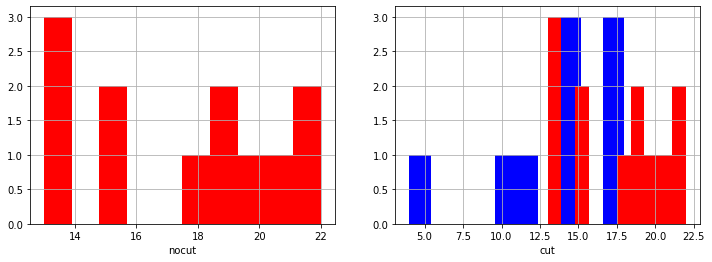

In [38]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(data_nocut, color = 'r')
pylab.xlabel('nocut')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(data_cut, color = 'b')
pylab.hist(data_nocut, color = 'r')
pylab.xlabel('cut')

pylab.show()

## Двухвыборочные критерии для независимых выборок

In [40]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(data_nocut))

95% confidence interval for the mean: [15.503261, 19.496739]


In [41]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(data_cut))

95% confidence interval for the mean: [10.726721, 16.606613]


### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [43]:
stats.mannwhitneyu(data_nocut, data_cut)

MannwhitneyuResult(statistic=27.0, pvalue=0.02900499272087373)

# Вопрос 6
28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.

С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
сделайте по 1000 псевдовыборок из каждой выборки.

In [53]:
data = pd.read_csv('challenger.txt', sep='\t')

In [115]:
data_incident0 = data[['Temperature']][data.Incident == 0]
data_incident1 = data[['Temperature']][data.Incident == 1]

In [116]:
data_incident0.mean()

Temperature    22.28125
dtype: float64

In [117]:
data_incident1.mean()

Temperature    17.614286
dtype: float64

In [121]:
def get_bootstrap_samples(data, n_samples):
    data = np.array(data)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [126]:
np.random.seed(0)
samples_incident0 = get_bootstrap_samples(data_incident0['Temperature'], 1000)
samples_incident1 = get_bootstrap_samples(data_incident1['Temperature'], 1000)

In [155]:
means_samples_incident0 = list(map(lambda x: x.mean(), samples_incident0))
means_samples_incident1 = list(map(lambda x: x.mean(), samples_incident1))

diffs = np.array(means_samples_incident1) - np.array(means_samples_incident0)

In [156]:
diffs

array([-3.79375   , -4.06160714, -1.97589286, -5.02142857, -2.06071429,
       -3.5625    , -5.93928571, -4.05982143, -6.99196429, -3.62678571,
       -4.00267857, -3.61071429, -3.62232143, -5.31160714, -5.76785714,
       -4.52410714, -2.18125   , -4.82589286, -6.13035714, -3.07857143,
       -4.69821429, -4.15446429, -1.44642857, -4.12946429, -4.83214286,
       -3.65625   , -3.66875   , -5.51160714, -2.33571429, -2.72857143,
       -1.04464286, -7.4625    , -4.14285714, -0.98839286, -5.87053571,
       -3.85803571, -2.67410714, -3.26339286, -6.28303571, -3.47321429,
       -4.79017857, -4.85803571, -4.21071429, -4.08214286, -1.59017857,
       -5.73125   , -5.93392857, -4.28214286, -3.65178571, -4.03928571,
       -3.69017857, -3.63392857, -6.71875   , -5.35535714, -4.41696429,
       -6.43839286, -5.52946429, -6.07589286, -3.87053571, -3.91071429,
       -6.8125    , -4.03392857, -1.55803571, -2.34910714, -3.69642857,
       -4.34464286, -7.89196429, -6.57589286, -5.40267857, -5.97

In [157]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(diffs))

95% confidence interval for the mean: [-4.739232, -4.526256]


In [152]:
from statsmodels.stats.weightstats import _tconfint_generic, _zconfint_generic

In [158]:
_tconfint_generic(diffs.mean(), diffs.std()/np.sqrt(len(diffs)), len(diffs) - 1, 0.05, 'two-sided')

(-4.739307727513558, -4.526179772486439)

In [159]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [162]:
np.random.seed(0)

inc_mean = np.array(list(map(np.mean, get_bootstrap_samples(samples_incident1, 1000))))
noinc_mean = np.array(list(map(np.mean, get_bootstrap_samples(samples_incident0, 1000))))

print("95% confidence interval:",  stat_intervals(inc_mean-noinc_mean, 0.05))

95% confidence interval: [-4.73881569 -4.52450353]


# Вопрос 7
На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте перестановочный критерий и двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки. 

Чтобы получить такое же значение, как мы:

установите random seed = 0;
возьмите 10000 перестановок.